# 01wk-1 – for lecture

최규빈  
2023-09-04

> 박스플랏, 히스토그램

<a href="https://colab.research.google.com/github/guebin/DV2023/blob/main/posts/01wk-1.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 강의영상

# import

In [6]:
import matplotlib.pyplot as plt 
import numpy as np 
#!pip install opencv-python
import cv2 

In [7]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (3, 2)  # 가로 6, 세로 4 크기의 그림
matplotlib.rcParams['figure.dpi'] = 150

# boxplot

## motivating example

`-` 통계란?

`-` 평균 좋아해요?

**`# 예제1` – 전북고등학교: 평균은 좋은 측정값인가?**

`-` 전북고등학교에서 통계학을 수업하는 A선생님과 B선생님의 있다.

In [34]:
y1=[75,75,76,76,77,77,78,79,79,98] # A선생님에게 통계학을 배운 학생의 점수들
y2=[76,76,77,77,78,78,79,80,80,81] # B선생님에게 통계학을 배운 학생의 점수들 

In [35]:
np.mean(y1), np.mean(y2)

In [36]:
arr = np.random.normal(size=(100,5))
arr.shape

In [37]:
np.mean(y1),np.mean(y2)

`-` 의사결정: A선생님에게 배운 학생들의 평균이 더 높다. -\> A선생님이 더
강의를 잘 하셨다?

`-` 반론: 평균은 A반(=A선생님에게 통계학을 배운 반)이 더 높다. 그런데
98점을 받은 학생이 A반에 포함되어서 A반이 전체평균이 높게 나온것이고
나머지 학생들은 전체적으로 B반 학생들이 더 시험을 잘 보았다고 해석할 수
있다.

`-` 교훈: 단순한 평균비교보다 학생들이 받은 점수의 분포를 비교해보는
것이 중요하다. 분포를 살펴보는 방법 중 유용한 방법이 박스플랏이다.

`#`

## matplotlib으로 boxplot 그리기

`-` A반 학생들의 박스플랏 그리기

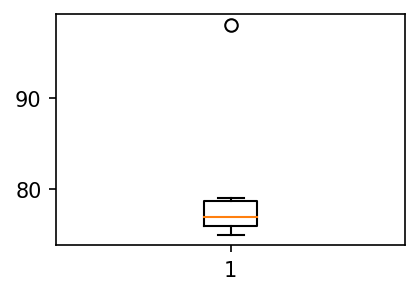

In [38]:
plt.boxplot(y1);

`-` B반 학생들의 박스플랏 그리기

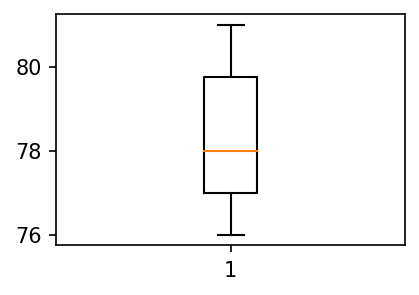

In [39]:
plt.boxplot(y2);

`-` A반 학생들의 점수와 B반 학생들의 점수를 나란히 박스플랏으로 그리자.

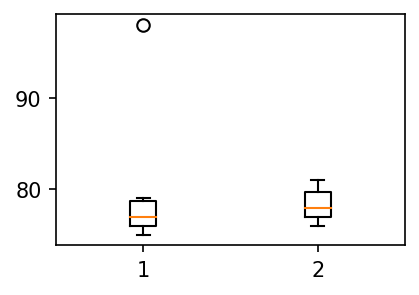

In [40]:
plt.boxplot([y1,y2]);

## boxplot이란?

`-` Galarnyk (2023)

-   <https://github.com/mGalarnyk/Python_Tutorials/blob/master/Statistics/boxplot/box_plot.ipynb>

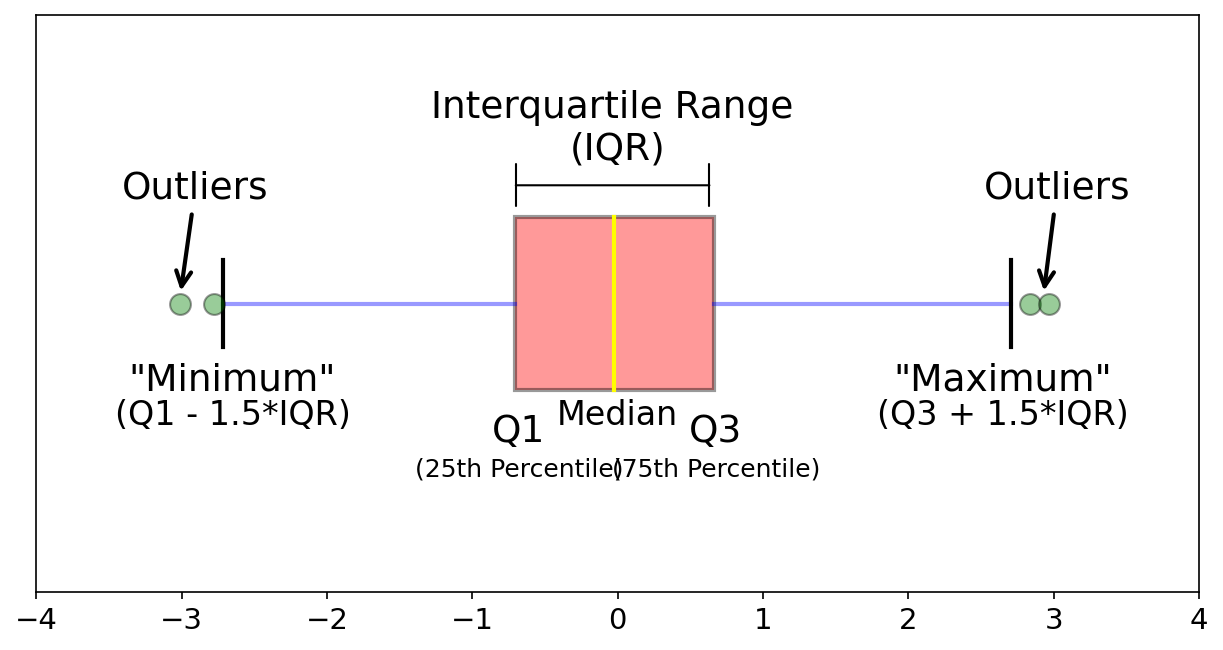

In [10]:
np.random.seed(916170)

# connection path is here: https://stackoverflow.com/questions/6146290/plotting-a-line-over-several-graphs
mu, sigma = 0, 1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 5))

# rectangular box plot
bplot = axes.boxplot(s,
                vert=False,
                patch_artist=True, 
                showfliers=True, # This would show outliers (the remaining .7% of the data)
                positions = [0],
                boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'red', alpha = .4),
                medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
                whiskerprops = dict(linestyle='-', linewidth=2, color='Blue', alpha = .4),
                capprops = dict(linestyle='-', linewidth=2, color='Black'),
                flierprops = dict(marker='o', markerfacecolor='green', markersize=10,
                  linestyle='none', alpha = .4),
                widths = .3,
                zorder = 1)   

axes.set_xlim(-4, 4)
plt.xticks(fontsize = 14)

axes.set_yticks([])
axes.annotate(r'',
            xy=(-.73, .205), xycoords='data',
            xytext=(.66, .205), textcoords='data',
            arrowprops=dict(arrowstyle="|-|",
                            connectionstyle="arc3")
            );

axes.text(0, .25, "Interquartile Range \n(IQR)",  horizontalalignment='center', fontsize=18)
axes.text(0, -.21, r"Median", horizontalalignment='center', fontsize=16);
axes.text(2.65, -.15, "\"Maximum\"", horizontalalignment='center', fontsize=18);
axes.text(-2.65, -.15, "\"Minimum\"", horizontalalignment='center', fontsize=18);
axes.text(-.68, -.24, r"Q1", horizontalalignment='center', fontsize=18);
axes.text(-2.65, -.21, r"(Q1 - 1.5*IQR)", horizontalalignment='center', fontsize=16);
axes.text(.6745, -.24, r"Q3", horizontalalignment='center', fontsize=18);
axes.text(.6745, -.30, r"(75th Percentile)", horizontalalignment='center', fontsize=12);
axes.text(-.68, -.30, r"(25th Percentile)", horizontalalignment='center', fontsize=12);
axes.text(2.65, -.21, r"(Q3 + 1.5*IQR)", horizontalalignment='center', fontsize=16);

axes.annotate('Outliers', xy=(2.93,0.015), xytext=(2.52,0.20), fontsize = 18,
            arrowprops={'arrowstyle': '->', 'color': 'black', 'lw': 2},
            va='center');

axes.annotate('Outliers', xy=(-3.01,0.015), xytext=(-3.41,0.20), fontsize = 18,
            arrowprops={'arrowstyle': '->', 'color': 'black', 'lw': 2},
            va='center');

## boxplot을 언제 쓰면 좋을까?

`-` 박스플랏의 장점

`-` 박스플랏이 이용되는 범위

`-` 박스플랏을 쓰는 경우

# histogram

## motivating example

`-` 전북고예제에서 우리의 소망: “A반 B반 중에 어떤 반이 공부를 더
잘하냐?”, “A선생님과 B선생님 중 어떤 분의 강의가 효과적이었다고 평할 수
있는가?” 와 같은 단순한 질문에 대한 대답

-   보통 이러한 질문은 **중심경향값** 중 하나를 골라서 비교하면 되었다.
-   여기에서 **중심경향값**이란 데이터 분포의 중심을 보여주는 값으로
    자료 전체를 대표할 수 있는 값을 말함. 평균, 중앙값등이 대표적인
    중심경향값이다.

`-` 전북고예제에서는 “A반 B반 중에서 어떤 반이 공부를 더 잘하냐?” 라는
질문의 대답으로 단순평균비교로는 의미가 없었다. 오히려 결과론적으로 보면
중앙값이 더 타당해 보인다.

`-` 그런데 사실 생각해보면 중앙값을 기준으로 B반이 공부를 더 잘했다고
주장하는 것도 애매하다. 어쨌든 가장 공부잘한 학생은 A반에 있으니까!
(에이 한명 뿐이잖아요? 라고 생각할 수 있는데 그 한명이 2명 3명으로 점점
늘어난다고 생각해보자, 합리적인 기준을 제시할 수 있는가?)

`-` 사실 “A반 B반중에 누가 더 공부를 잘하냐?” 라는 질문은 굉장히
대답하기 곤란한 질문이다. 왜냐하면

-   이슈1: 단순 평균비교로 이러한 질문에 답을 하기 어렵다.
-   이슈2: 박스플랏으로 전체분포를 파악해도 어떠한 반이 더 공부를
    잘한다는 기준을 잡는게 애매하다.

그런데 특수한 경우에는 “A반 B반중에 누가 더 공부를 잘하냐?” 라는 질문에
대한 대답을 깔끔하게 할 수 있다.

**`# 예제2` – 정규분포 전북고등학교: 평균은 좋은 측정값인가?**

`-` A반과 B반의 통계학 성적이 아래와 같다고 하자.

In [14]:
np.random.seed(43052)
y1 = np.random.randn(10000)
y2 = np.random.randn(10000) + 0.5 

In [15]:
np.mean(y1),np.mean(y2)

In [16]:
np.mean(y2) - np.mean(y1)

y2의 값이 y1의 값보다 전체적으로 0.5097056259662253 정도 높다고 볼 수
있다?

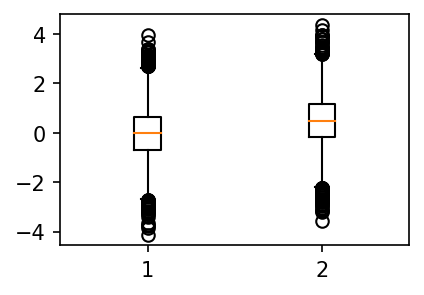

In [17]:
plt.boxplot([y1,y2]);

-   분포의 모양이 거의 비슷, 왼쪽그림을 컨트롤+C 하여 오른쪽에 붙인다음
    0.5정도 y축으로 올린느낌이다!

`-` 이러한 상황에서는 “B반의 성적 $\approx$ A반의 성적 + 0.5” 라고
주장해도 큰 무리가 없어보인다. 따라서 이 경우에는 “A반 B반 중에 어떤반이
더 공부를 잘하냐?” 라는 질문에 대하여 “B반이 평균적으로 0.5점정도 더
공부를 잘합니다” 라고 대답해도 괜찮다.

`-` 결론: 정규분포 분포가정을 한다면 이슈1,2에 대한 문제를 한번에
해결가능함

`#`

`-` 정규분포가정은 어떻게 할 수 있나? (= 데이터를 보고 어떻게
정규분포라고 알 수 있는가?): 데이터의 히스토그램을 그려서 종 모양이
되는지 확인해본다.[1]

### histogram 이란?

`-` 히스토그램: X축이 변수의 구간, Y축은 그 구간에 포함된 빈도를
의미하는 그림

### histogram 그리기

`-` 히스토그램의 예시1

[1] 아직 초보단계라서 이것밖에 모를 수 있어요

In [18]:
y=[10,11,12,15,16,20,21,22,23,24,25]

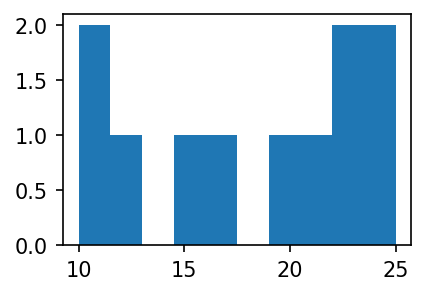

In [19]:
plt.hist(y)

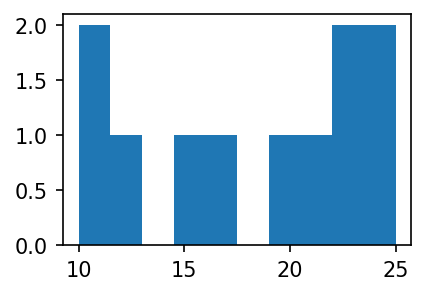

In [20]:
plt.hist(y,bins=10)

`-` 히스토그램 예시2

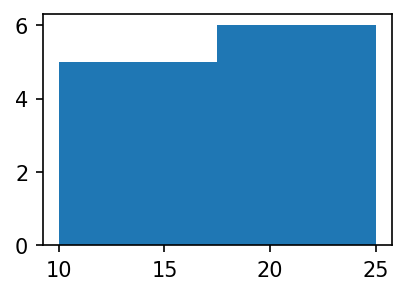

In [21]:
plt.hist(y,bins=2)
#plt.hist(y,bins=1)

`-` 히스토그램 예시3

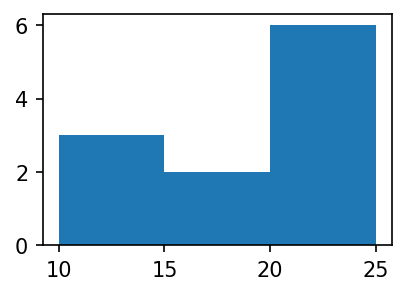

In [22]:
plt.hist(y,bins=3)

-   가장 큰 값은 25, 가장 작은 값은 10이므로 range는 15이다.
-   range / bins = 15 / 3 = 5 이므로 각 구간의 간격은 5이다.
-   구간은 \[10,15), \[15,20), \[20,25\] 로 나눈다.
-   각 구간에 포함된 자료의 수는 3,2,6 이다.

`-` 히스토그램 예시4

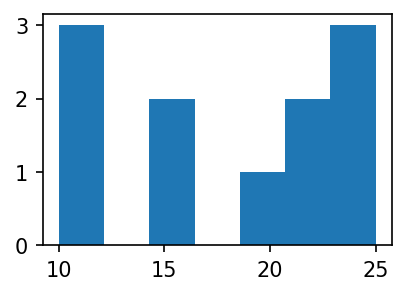

In [23]:
plt.hist(y,bins=7) 

-   가장 큰 값은 25, 가장 작은 값은 10이므로 range는 15이다.
-   range / bins = 15 / 7 = 2.142857142857143 이므로 각 구간의 간격은
    2.142857142857143이다.
-   구간은 \[10,12.14285714), \[12.14285714,14.28571429,),
    \[22.85714286,25\] 로 나눈다.
-   각 구간에 포함된 자료의 수는 3,0,2,0,1,2,3 이다.

`-` 히스토그램 예시5

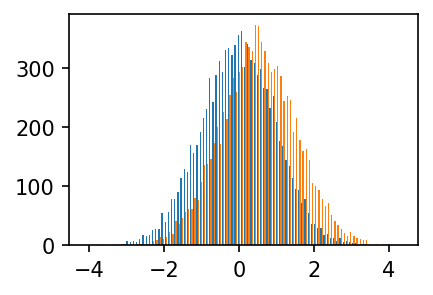

In [47]:
np.random.seed(43052)
y1 = np.random.randn(10000)
y2 = np.random.randn(10000) + 0.5 
plt.hist([y1,y2],bins=100);

# HE

## 예비학습1: 이미지자료 다운로드

In [48]:
!wget https://upload.wikimedia.org/wikipedia/commons/0/08/Unequalized_Hawkes_Bay_NZ.jpg
img = cv2.imread('Unequalized_Hawkes_Bay_NZ.jpg')

--2023-09-04 11:28:43--  https://upload.wikimedia.org/wikipedia/commons/0/08/Unequalized_Hawkes_Bay_NZ.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 110895 (108K) [image/jpeg]
Saving to: ‘Unequalized_Hawkes_Bay_NZ.jpg’

Unequalized_Hawkes_ 100%[===================>] 108.30K   450KB/s    in 0.2s    

2023-09-04 11:28:44 (450 KB/s) - ‘Unequalized_Hawkes_Bay_NZ.jpg’ saved [110895/110895]


In [49]:
img.shape

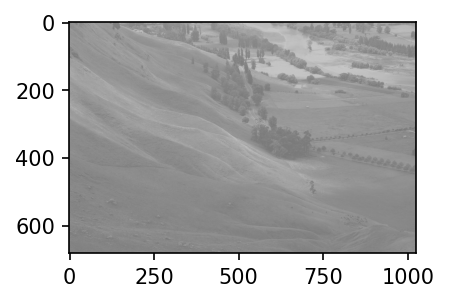

In [50]:
plt.imshow(img)

## 예비학습2: 이미지자료의 이해

### 비밀1: 이미지는 사실 숫자들의 집합이었음.

`-` 예시1

In [5]:
_img1 = np.array([0,30,90,120,150,180,210,240,255]).reshape(3,3)
_img1

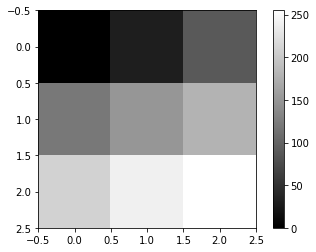

In [6]:
plt.imshow(_img1,cmap='gray')
plt.colorbar()

`-` 예시2

In [7]:
_img2 = np.array([0,20,40,60,80,100,120,140,160]).reshape(3,3)
_img2

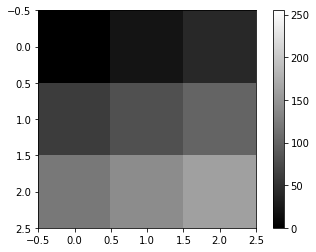

In [8]:
plt.imshow(_img2,cmap='gray',vmin=0,vmax=255)
plt.colorbar()

`-` 예시3

In [9]:
_img3 = np.concatenate([_img1,_img2],axis=1)
_img3

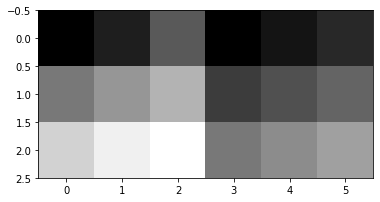

In [10]:
plt.imshow(_img3,cmap='gray')

### 비밀2: 칼라이미지는 red + green + blue 의 조합으로 표현가능 (다른방식도 가능)

`-` 예시1

In [11]:
r = np.array([0]*25*3).reshape(5,5,3) 
g = np.array([0]*25*3).reshape(5,5,3) 
b = np.array([0]*25*3).reshape(5,5,3) 

In [12]:
r[:3,:3,0] = 255   
g[:3,2:,1] = 255
b[2:,:,2] = 255 

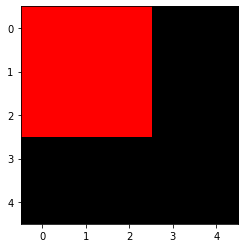

In [13]:
plt.imshow(r)

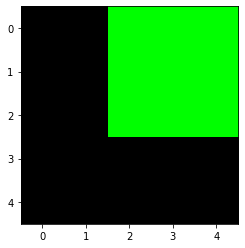

In [14]:
plt.imshow(g)

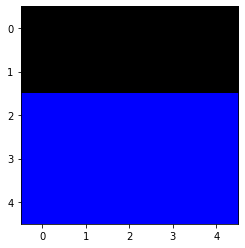

In [15]:
plt.imshow(b)

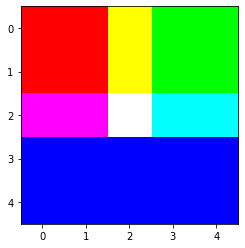

In [16]:
plt.imshow(r+g+b)

`-` 예시2: R,G,B를 같은 비율로 섞으면 무채색이 된다.

In [17]:
r = np.array([0]*25*3).reshape(5,5,3) 
g = np.array([0]*25*3).reshape(5,5,3) 
b = np.array([0]*25*3).reshape(5,5,3) 
r[:3,:3,0] = 80   
g[:3,2:,1] = 80
b[2:,:,2] = 80 

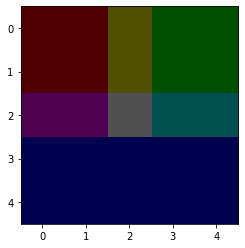

In [18]:
plt.imshow(r+g+b)

`-` 예시3: 우리가 관심있는 자료

In [19]:
img.shape

In [20]:
img_red = img * 0 
img_green = img * 0 
img_blue = img * 0 

In [21]:
img_red[...,0] = img[...,0] 
img_green[...,1] = img[...,1] 
img_blue[...,2] = img[...,2] 

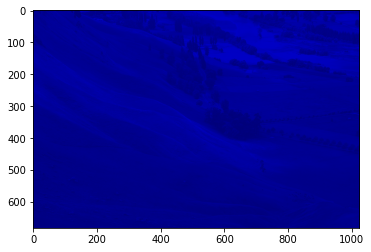

In [22]:
plt.imshow(img_blue)

## 히스토그램 이퀄라이제이션 (칼라)

`-` 이미지를 rgb로 각각 분리하고 각 색깔들의 히스토그램을 그려보자.

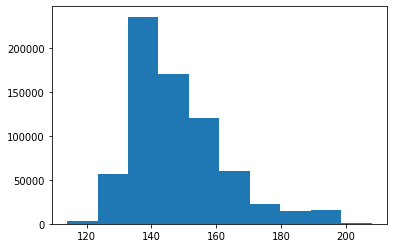

In [23]:
plt.hist(img[:,:,0].reshape(-1))

-   히스토그램 그림1

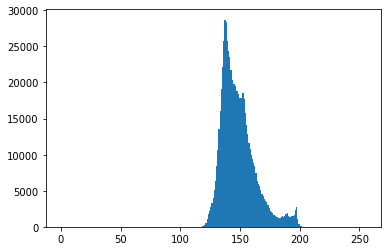

In [24]:
_fig = plt.hist(img[:,:,0].reshape(-1),bins=255, range=[0,255])

-   히스토그램 그림2
-   120-200 사이에 값이 몰려있음
-   그런데 컴퓨터가 표현가능한 색은 0~255..
-   만약에 120-200까지의 분포된 모양은 그대로 유지하면서 range를 0-255
    까지 늘린다면?

`-` 분포의 모양은 대략적으로 유지하면서 값을 퍼트리자!

In [25]:
img2_red = cv2.equalizeHist(img[...,0])

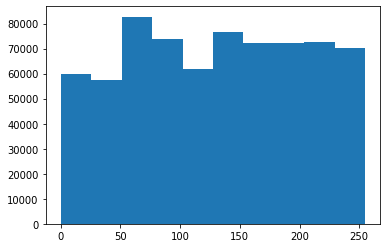

In [26]:
plt.hist(img2_red.reshape(-1))

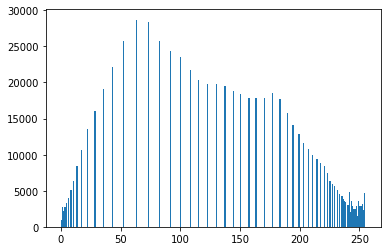

In [27]:
_fig=plt.hist(img2_red.reshape(-1),bins=255,range=(0,255))

`-` red말고 다른채널에도 이와 같은 변환을 정의한다면?

In [28]:
img2 = np.stack([img2_red,img2_red,img2_red],axis=-1)

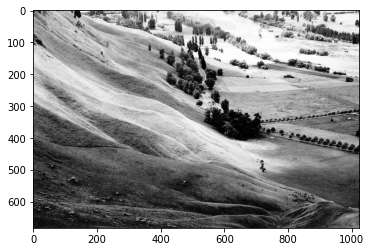

In [29]:
plt.imshow(img2)

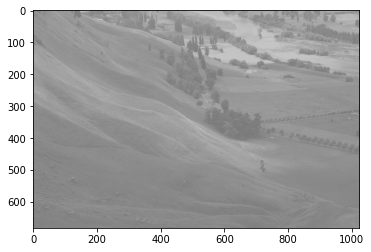

In [30]:
plt.imshow(img)

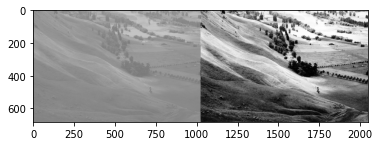

In [31]:
plt.imshow(np.concatenate([img,img2],axis=1))

## 히스토그램 이퀄라이제이션 (흑백)

In [32]:
img_black =  cv2.imread('Unequalized_Hawkes_Bay_NZ.jpg',0)

In [33]:
img_black2 = cv2.equalizeHist(img_black)

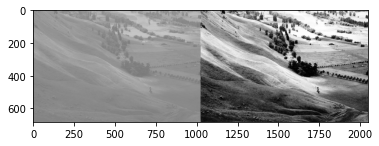

In [34]:
plt.imshow(np.concatenate([img_black,img_black2],axis=1),cmap='gray')

# 숙제

`-` HE(Histogram Equalization)을 이용하여 아래주소에 저장된 이미지의
명암비를 보존하라

<https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/hw_img.png>

Galarnyk, Michael. 2023. “Python_tutorials.”
<https://github.com/mGalarnyk/Python_Tutorials>.